[array([0.24392, 0.1436 , 0.17292, 0.05084, 0.08092, 0.09192]), array([0.246  , 0.29711, 0.121  , 0.06793, 0.043  , 0.12686]), array([0.22968, 0.50244, 0.148  , 0.05   , 0.04   , 0.088  ])]


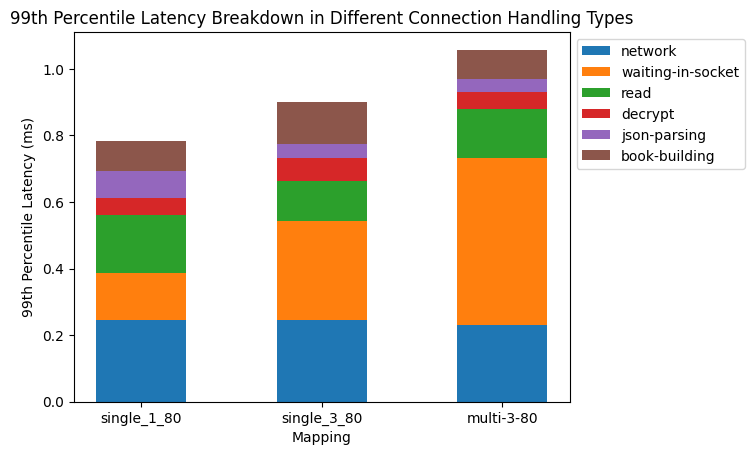

In [101]:
import matplotlib.pyplot as plt
import numpy as np

files = []

# Function to filter lines based on the condition
def filter_lines(file_path):
    filtered_lines = []
    with open(file_path, "r") as file:
        for line in file:
            values = [float(val) for val in line.strip().split(',')]
            if all(val < 2 for val in values) and values[0] < 0.25:
                filtered_lines.append(line)
    return filtered_lines

# Read and filter each file
files.append(filter_lines("mapping-kraken-book-builder/single-1-80-kraken.txt"))
files.append(filter_lines("mapping-kraken-book-builder/mapping-kraken-book-builder-data.txt"))
files.append(filter_lines("mapping-kraken-book-builder/multi-3-80-kraken.txt"))

types = (
    "single_1_80",
    "single_3_80",
    "multi-3-80",
)

# Convert the filtered lines into NumPy arrays
datas = [np.array([[float(val) for val in line.strip().split(',')] for line in file]) for file in files]

# # Calculate the 99th percentile for each column
# processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))
processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))

print(processed_datas)
latency_percentiles_99 = {
    "network": np.array([processed_data[0] for processed_data in processed_datas]),
    "waiting-in-socket": np.array([processed_data[1] for processed_data in processed_datas]),
    "read": np.array([processed_data[2] for processed_data in processed_datas]),
    "decrypt": np.array([processed_data[3] for processed_data in processed_datas]),
    "json-parsing": np.array([processed_data[4] for processed_data in processed_datas]),
    "book-building": np.array([processed_data[5] for processed_data in processed_datas]),
}

width = 0.5

fig, ax = plt.subplots()
total_latency = np.zeros(len(types))

for stage, latency in latency_percentiles_99.items():
    p = ax.bar(types, latency, width, label=stage, bottom=total_latency)
    total_latency += latency

ax.set_title("99th Percentile Latency Breakdown in Different Connection Handling Types")

ax.set_xlabel('Mapping')
ax.set_ylabel('99th Percentile Latency (ms)')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
